# Mutual Information Scores

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df.isna().sum()
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Seperate X and Y

In [5]:
X = df.drop(labels=['PassengerId','Name','Survived'],axis=1)
Y = df[['Survived']]

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Cat, Con Seperation

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [10]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
cat1 = ['Cabin']
cat2 = ['Sex','Ticket','Embarked']

### Sklearn Pipeline for Feature Selection

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='Unknown')),
                            ('ordinal',OrdinalEncoder())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ordinal',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])

In [14]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  5.23000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  5.96000000e+02,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  6.69000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  6.75000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  8.00000000e+00,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  4.66000000e+02,  1.00000000e+00]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin', 'cat2__Sex', 'cat2__Ticket', 'cat2__Embarked'],
      dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin,cat2__Sex,cat2__Ticket,cat2__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,147.0,1.0,523.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,81.0,0.0,596.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,147.0,0.0,669.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,55.0,0.0,49.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,147.0,1.0,472.0,2.0


### Mutual Information Classification

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)
mi

array([0.0646558 , 0.0084328 , 0.00120177, 0.01069369, 0.12564124,
       0.04599277, 0.13700218, 0.12365079, 0.        ])

In [18]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

cat2__Sex         0.137002
num__Fare         0.125641
cat2__Ticket      0.123651
num__Pclass       0.064656
cat1__Cabin       0.045993
num__Parch        0.010694
num__Age          0.008433
num__SibSp        0.001202
cat2__Embarked    0.000000
dtype: float64

<Axes: >

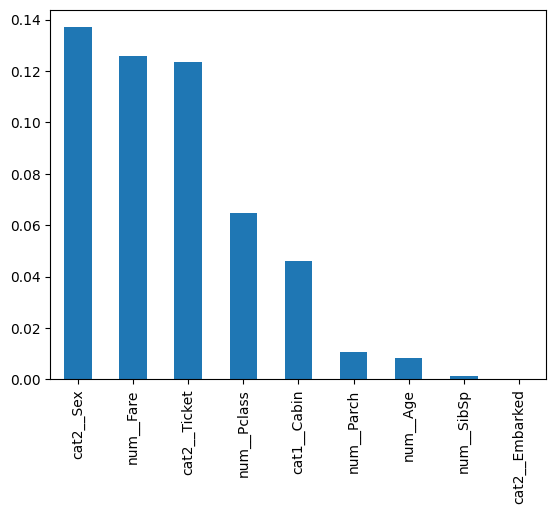

In [19]:
mi.plot(kind='bar')

In [20]:
imp_cols = mi[0:5].index
imp_cols

Index(['cat2__Sex', 'num__Fare', 'cat2__Ticket', 'num__Pclass', 'cat1__Cabin'], dtype='object')

In [21]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif,k=5)
sel_cols = sel.fit_transform(X_pre,Y)

In [22]:
sel.get_feature_names_out()

array(['num__Pclass', 'num__Fare', 'cat1__Cabin', 'cat2__Sex',
       'cat2__Ticket'], dtype=object)

In [23]:
sel_cols = []
for i in imp_cols:
    s = i.split('__')
    sel_cols.append(s[1])

In [24]:
sel_cols

['Sex', 'Fare', 'Ticket', 'Pclass', 'Cabin']

In [25]:
X_sel = X[sel_cols]
X_sel.head()

,Sex,Fare,Ticket,Pclass,Cabin
0,male,7.2500,A/5 21171,3,NaN
1,female,71.2833,PC 17599,1,C85
2,female,7.9250,STON/O2. 3101282,3,NaN
3,female,53.1000,113803,1,C123
4,male,8.0500,373450,3,NaN


### Cat Con Sep

In [26]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [27]:
cat_sel

['Sex', 'Ticket', 'Cabin']

In [28]:
cat_sel1 = ['Cabin']
cat_sel2 = ['Sex','Ticket']

In [29]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Final Pipeline

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipe_sel = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                               ('scaler',StandardScaler())])

cat_pipe_sel1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                                ('ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe_sel2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre_sel = ColumnTransformer([('num',num_pipe_sel,con_sel),
                             ('cat1',cat_pipe_sel1,cat_sel1),
                             ('cat2',cat_pipe_sel2,cat_sel2)])  

In [33]:
X_sel_pre = pre_sel.fit_transform(X_sel).toarray()
X_sel_pre

array([[-0.50244517,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78684529, -1.56610693,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.48885426,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.17626324,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.04438104, -1.56610693,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.49237783,  0.82737724,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
cols1 = pre_sel.get_feature_names_out()
cols1

array(['num__Fare', 'num__Pclass', 'cat1__Cabin_A10', 'cat1__Cabin_A14',
       'cat1__Cabin_A16', 'cat1__Cabin_A19', 'cat1__Cabin_A20',
       'cat1__Cabin_A23', 'cat1__Cabin_A24', 'cat1__Cabin_A26',
       'cat1__Cabin_A31', 'cat1__Cabin_A32', 'cat1__Cabin_A34',
       'cat1__Cabin_A36', 'cat1__Cabin_A5', 'cat1__Cabin_A6',
       'cat1__Cabin_A7', 'cat1__Cabin_B101', 'cat1__Cabin_B102',
       'cat1__Cabin_B18', 'cat1__Cabin_B19', 'cat1__Cabin_B20',
       'cat1__Cabin_B22', 'cat1__Cabin_B28', 'cat1__Cabin_B3',
       'cat1__Cabin_B30', 'cat1__Cabin_B35', 'cat1__Cabin_B37',
       'cat1__Cabin_B38', 'cat1__Cabin_B39', 'cat1__Cabin_B4',
       'cat1__Cabin_B41', 'cat1__Cabin_B42', 'cat1__Cabin_B49',
       'cat1__Cabin_B5', 'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'cat1__Cabin_B79',
       'cat1__Cabin_B80', 'cat

In [36]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=cols1)
X_sel_pre.head()

,num__Fare,num__Pclass,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,cat1__Cabin_A23,cat1__Cabin_A24,cat1__Cabin_A26,...,cat2__Ticket_STON/O2. 3101290,cat2__Ticket_SW/PP 751,cat2__Ticket_W./C. 14258,cat2__Ticket_W./C. 14263,cat2__Ticket_W./C. 6607,cat2__Ticket_W./C. 6608,cat2__Ticket_W./C. 6609,cat2__Ticket_W.E.P. 5734,cat2__Ticket_W/C 14208,cat2__Ticket_WE/P 5735
0,-0.502445,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.786845,-1.566107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.488854,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.420730,-1.566107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.486337,0.827377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train test split

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=42)

In [38]:
xtrain.shape

(712, 833)

In [39]:
xtest.shape

(179, 833)

### GBC tuning

In [40]:
params = {'n_estimators':[50,100,200,300],
          'learning_rate':[0.01,0.05,0.1],
          'max_depth':[3,4,5,6,7,8,9,10]}

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1')

In [42]:
rscv.best_params_

{'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}

In [43]:
rscv.best_score_

0.7363601680751388

In [44]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=8, n_estimators=200)

In [45]:
best_gbc.score(xtrain,ytrain)

0.9873595505617978

In [46]:
best_gbc.score(xtest,ytest)

0.8212290502793296

### Predicting train and test data

In [47]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [48]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [49]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [50]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [51]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


array([0, 1], dtype=int64)

### Confusion Matrix

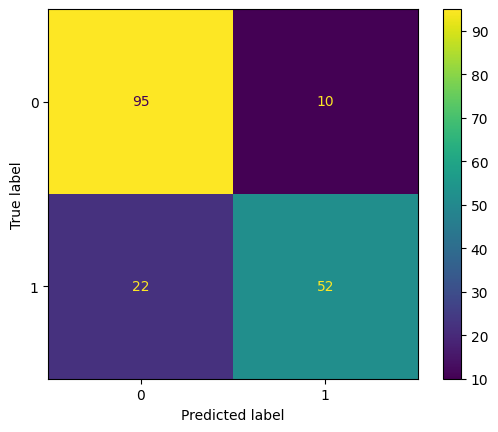

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

